In [2]:
# Import All the required Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pd.options.display.float_format = '{:20,.2f}'.format

In [4]:
# Read the Loan file for analysis
loans = pd.read_csv('loan.csv' ,dtype={'next_pymnt_d': str})
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan


In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
loans.describe() 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,"39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00",...,0.00,0.00,0.00,0.00,"39,020.00","39,678.00",0.00,0.00,0.00,0.00
mean,"683,131.91","850,463.56","11,219.44","10,947.71","10,397.45",324.56,"68,968.93",13.32,0.15,0.87,...,nan,nan,nan,nan,0.04,0.00,nan,nan,nan,nan
std,"210,694.13","265,678.31","7,456.67","7,187.24","7,128.45",208.87,"63,793.77",6.68,0.49,1.07,...,nan,nan,nan,nan,0.20,0.00,nan,nan,nan,nan
min,"54,734.00","70,699.00",500.00,500.00,0.00,15.69,"4,000.00",0.00,0.00,0.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
25%,"516,221.00","666,780.00","5,500.00","5,400.00","5,000.00",167.02,"40,404.00",8.17,0.00,0.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
50%,"665,665.00","850,812.00","10,000.00","9,600.00","8,975.00",280.22,"59,000.00",13.40,0.00,1.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
75%,"837,755.00","1,047,339.00","15,000.00","15,000.00","14,400.00",430.78,"82,300.00",18.60,0.00,1.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
max,"1,077,501.00","1,314,167.00","35,000.00","35,000.00","35,000.00","1,305.19","6,000,000.00",29.99,11.00,8.00,...,nan,nan,nan,nan,2.00,0.00,nan,nan,nan,nan


In [6]:
# Columns after 49 are mostly NaN, so it is better to drop them (checked in excel)
loan = loans[loans.columns[0:49]]
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,...,"5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,...,"1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,...,"3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,...,"12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,...,"3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,Jun-16,May-16


In [7]:
# list the available columns
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d'],
      dtype='object')

In [8]:
# Further Analysing the below columns do not provide much insight, so can be dropped
loan[['url','emp_title', 'desc', 'title', 'zip_code']]

,url,emp_title,desc,title,zip_code
0,https://lendingclub.com/browse/loanDetail.acti...,NaN,Borrower added on 12/22/11 > I need to upgra...,Computer,860xx
1,https://lendingclub.com/browse/loanDetail.acti...,Ryder,Borrower added on 12/22/11 > I plan to use t...,bike,309xx
2,https://lendingclub.com/browse/loanDetail.acti...,NaN,NaN,real estate business,606xx
3,https://lendingclub.com/browse/loanDetail.acti...,AIR RESOURCES BOARD,Borrower added on 12/21/11 > to pay for prop...,personel,917xx
4,https://lendingclub.com/browse/loanDetail.acti...,University Medical Group,Borrower added on 12/21/11 > I plan on combi...,Personal,972xx
5,https://lendingclub.com/browse/loanDetail.acti...,Veolia Transportaton,NaN,My wedding loan I promise to pay back,852xx
6,https://lendingclub.com/browse/loanDetail.acti...,Southern Star Photography,Borrower added on 12/18/11 > I am planning o...,Loan,280xx
7,https://lendingclub.com/browse/loanDetail.acti...,MKC Accounting,Borrower added on 12/16/11 > Downpayment for...,Car Downpayment,900xx
8,https://lendingclub.com/browse/loanDetail.acti...,NaN,Borrower added on 12/21/11 > I own a small h...,Expand Business & Buy Debt Portfolio,958xx
9,https://lendingclub.com/browse/loanDetail.acti...,Starbucks,Borrower added on 12/16/11 > I'm trying to b...,Building my credit history.,774xx


In [9]:
loan.drop(['url','emp_title', 'desc', 'title', 'zip_code'], axis=1, inplace=True)

/home/shashi/.local/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [10]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
id                         39717 non-null int64
member_id                  39717 non-null int64
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null object
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null object
loan_status                39717 non-null object
pymnt_plan                 39717 non-null object
purpose                    39717 non-null object
addr_state

In [11]:
# The following columns have too many records missing, hence can be dropped
missing_records = ['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','recoveries','collection_recovery_fee','delinq_2yrs','collection_recovery_fee','out_prncp','out_prncp_inv']
loan[['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','recoveries','collection_recovery_fee','delinq_2yrs','collection_recovery_fee','out_prncp','out_prncp_inv']]

,next_pymnt_d,mths_since_last_record,mths_since_last_delinq,recoveries,collection_recovery_fee,delinq_2yrs,collection_recovery_fee,out_prncp,out_prncp_inv
0,NaN,nan,nan,0.00,0.00,0,0.00,0.00,0.00
1,NaN,nan,nan,117.08,1.11,0,1.11,0.00,0.00
2,NaN,nan,nan,0.00,0.00,0,0.00,0.00,0.00
3,NaN,nan,35.00,0.00,0.00,0,0.00,0.00,0.00
4,Jun-16,nan,38.00,0.00,0.00,0,0.00,524.06,524.06
5,NaN,nan,nan,0.00,0.00,0,0.00,0.00,0.00
6,NaN,nan,nan,0.00,0.00,0,0.00,0.00,0.00
7,NaN,nan,nan,0.00,0.00,0,0.00,0.00,0.00
8,NaN,nan,nan,189.06,2.09,0,2.09,0.00,0.00
9,NaN,nan,nan,269.29,2.52,0,2.52,0.00,0.00


In [12]:
loan.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','recoveries','collection_recovery_fee','delinq_2yrs','collection_recovery_fee','out_prncp','out_prncp_inv'], axis=1,inplace=True)

In [13]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
id                     39717 non-null int64
member_id              39717 non-null int64
loan_amnt              39717 non-null int64
funded_amnt            39717 non-null int64
funded_amnt_inv        39717 non-null float64
term                   39717 non-null object
int_rate               39717 non-null object
installment            39717 non-null float64
grade                  39717 non-null object
sub_grade              39717 non-null object
emp_length             38642 non-null object
home_ownership         39717 non-null object
annual_inc             39717 non-null float64
verification_status    39717 non-null object
issue_d                39717 non-null object
loan_status            39717 non-null object
pymnt_plan             39717 non-null object
purpose                39717 non-null object
addr_state             39717 non-null object
dti                    39717 non-null

In [14]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,...,9,f,"5,863.16","5,833.84","5,000.00",863.16,0.00,Jan-15,171.62,May-16
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,...,4,f,"1,008.71","1,008.71",456.46,435.17,0.00,Apr-13,119.66,Sep-13
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,...,10,f,"3,005.67","3,005.67","2,400.00",605.67,0.00,Jun-14,649.91,May-16
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,...,37,f,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,Jan-15,357.48,Apr-16
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,...,38,f,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,May-16,67.79,May-16


In [15]:
# the following column can also be dropped as it has only one value
loan['initial_list_status'].nunique()

1

In [16]:
loan.drop(['initial_list_status'],axis=1,inplace=True)

In [17]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,...,83.70%,9,"5,863.16","5,833.84","5,000.00",863.16,0.00,Jan-15,171.62,May-16
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,...,9.40%,4,"1,008.71","1,008.71",456.46,435.17,0.00,Apr-13,119.66,Sep-13
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,...,98.50%,10,"3,005.67","3,005.67","2,400.00",605.67,0.00,Jun-14,649.91,May-16
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,...,21%,37,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,Jan-15,357.48,Apr-16
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,...,53.90%,38,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,May-16,67.79,May-16


In [18]:
# the following field also has lot of missing values and can be dropped
loan[['total_rec_late_fee','pub_rec']]

,total_rec_late_fee,pub_rec
0,0.00,0
1,0.00,0
2,0.00,0
3,16.97,0
4,0.00,0
5,0.00,0
6,0.00,0
7,0.00,0
8,0.00,0
9,0.00,0


In [ ]:
loan.drop(['total_rec_late_fee','pub_rec'],axis=1,inplace=True)

In [ ]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,...,13648,83.70%,9,"5,863.16","5,833.84","5,000.00",863.16,Jan-15,171.62,May-16
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,...,1687,9.40%,4,"1,008.71","1,008.71",456.46,435.17,Apr-13,119.66,Sep-13
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,...,2956,98.50%,10,"3,005.67","3,005.67","2,400.00",605.67,Jun-14,649.91,May-16
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,...,5598,21%,37,"12,231.89","12,231.89","10,000.00","2,214.92",Jan-15,357.48,Apr-16
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,...,27783,53.90%,38,"3,513.33","3,513.33","2,475.94","1,037.39",May-16,67.79,May-16


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 33 columns):
id                     39717 non-null int64
member_id              39717 non-null int64
loan_amnt              39717 non-null int64
funded_amnt            39717 non-null int64
funded_amnt_inv        39717 non-null float64
term                   39717 non-null object
int_rate               39717 non-null object
installment            39717 non-null float64
grade                  39717 non-null object
sub_grade              39717 non-null object
emp_length             38642 non-null object
home_ownership         39717 non-null object
annual_inc             39717 non-null float64
verification_status    39717 non-null object
issue_d                39717 non-null object
loan_status            39717 non-null object
pymnt_plan             39717 non-null object
purpose                39717 non-null object
addr_state             39717 non-null object
dti                    39717 non-null

In [ ]:
# the below columns do not have any effect on repayment, can be dropped
loan[['last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']]
loan.drop(['last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'],axis=1,inplace=True)

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 30 columns):
id                     39717 non-null int64
member_id              39717 non-null int64
loan_amnt              39717 non-null int64
funded_amnt            39717 non-null int64
funded_amnt_inv        39717 non-null float64
term                   39717 non-null object
int_rate               39717 non-null object
installment            39717 non-null float64
grade                  39717 non-null object
sub_grade              39717 non-null object
emp_length             38642 non-null object
home_ownership         39717 non-null object
annual_inc             39717 non-null float64
verification_status    39717 non-null object
issue_d                39717 non-null object
loan_status            39717 non-null object
pymnt_plan             39717 non-null object
purpose                39717 non-null object
addr_state             39717 non-null object
dti                    39717 non-null

In [ ]:
# the following columns should be numeric but are object, should be converted to numeric
# term                   39717 non-null object
# int_rate               39717 non-null object
# we will need to remove 'months' from term column and '% from 'int_rate' column before converting them to numeric
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,...,Jan-85,1,3,13648,83.70%,9,"5,863.16","5,833.84","5,000.00",863.16
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,...,Apr-99,5,3,1687,9.40%,4,"1,008.71","1,008.71",456.46,435.17
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,...,Nov-01,2,2,2956,98.50%,10,"3,005.67","3,005.67","2,400.00",605.67
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,...,Feb-96,1,10,5598,21%,37,"12,231.89","12,231.89","10,000.00","2,214.92"
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,...,Jan-96,0,15,27783,53.90%,38,"3,513.33","3,513.33","2,475.94","1,037.39"


In [ ]:
# Removing '%' and 'months' from the 'int_rate' and 'term' columns and converting them to numeric
loan['int_rate'] = loan.int_rate.str.rstrip('%').astype('float64')
loan['term'] = loan.term.str.rstrip('months').astype('int64')

/home/shashi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/shashi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
0,1077501,1296599,5000,5000,"4,975.00",36,10.65,162.87,B,B2,...,Jan-85,1,3,13648,83.70%,9,"5,863.16","5,833.84","5,000.00",863.16
1,1077430,1314167,2500,2500,"2,500.00",60,15.27,59.83,C,C4,...,Apr-99,5,3,1687,9.40%,4,"1,008.71","1,008.71",456.46,435.17
2,1077175,1313524,2400,2400,"2,400.00",36,15.96,84.33,C,C5,...,Nov-01,2,2,2956,98.50%,10,"3,005.67","3,005.67","2,400.00",605.67
3,1076863,1277178,10000,10000,"10,000.00",36,13.49,339.31,C,C1,...,Feb-96,1,10,5598,21%,37,"12,231.89","12,231.89","10,000.00","2,214.92"
4,1075358,1311748,3000,3000,"3,000.00",60,12.69,67.79,B,B5,...,Jan-96,0,15,27783,53.90%,38,"3,513.33","3,513.33","2,475.94","1,037.39"


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 30 columns):
id                     39717 non-null int64
member_id              39717 non-null int64
loan_amnt              39717 non-null int64
funded_amnt            39717 non-null int64
funded_amnt_inv        39717 non-null float64
term                   39717 non-null int64
int_rate               39717 non-null float64
installment            39717 non-null float64
grade                  39717 non-null object
sub_grade              39717 non-null object
emp_length             38642 non-null object
home_ownership         39717 non-null object
annual_inc             39717 non-null float64
verification_status    39717 non-null object
issue_d                39717 non-null object
loan_status            39717 non-null object
pymnt_plan             39717 non-null object
purpose                39717 non-null object
addr_state             39717 non-null object
dti                    39717 non-null

In [ ]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
count,"39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00"
mean,"683,131.91","850,463.56","11,219.44","10,947.71","10,397.45",42.42,12.02,324.56,"68,968.93",13.32,0.87,9.29,"13,382.53",22.09,"12,153.60","11,567.15","9,793.35","2,263.66"
std,"210,694.13","265,678.31","7,456.67","7,187.24","7,128.45",10.62,3.72,208.87,"63,793.77",6.68,1.07,4.40,"15,885.02",11.40,"9,042.04","8,942.67","7,065.52","2,608.11"
min,"54,734.00","70,699.00",500.00,500.00,0.00,36.00,5.42,15.69,"4,000.00",0.00,0.00,2.00,0.00,2.00,0.00,0.00,0.00,0.00
25%,"516,221.00","666,780.00","5,500.00","5,400.00","5,000.00",36.00,9.25,167.02,"40,404.00",8.17,0.00,6.00,"3,703.00",13.00,"5,576.93","5,112.31","4,600.00",662.18
50%,"665,665.00","850,812.00","10,000.00","9,600.00","8,975.00",36.00,11.86,280.22,"59,000.00",13.40,1.00,9.00,"8,850.00",20.00,"9,899.64","9,287.15","8,000.00","1,348.91"
75%,"837,755.00","1,047,339.00","15,000.00","15,000.00","14,400.00",60.00,14.59,430.78,"82,300.00",18.60,1.00,12.00,"17,058.00",29.00,"16,534.43","15,798.81","13,653.26","2,833.40"
max,"1,077,501.00","1,314,167.00","35,000.00","35,000.00","35,000.00",60.00,24.59,"1,305.19","6,000,000.00",29.99,8.00,44.00,"149,588.00",90.00,"58,563.68","58,563.68","35,000.02","23,563.68"


In [ ]:
lcorr = loan.corr()

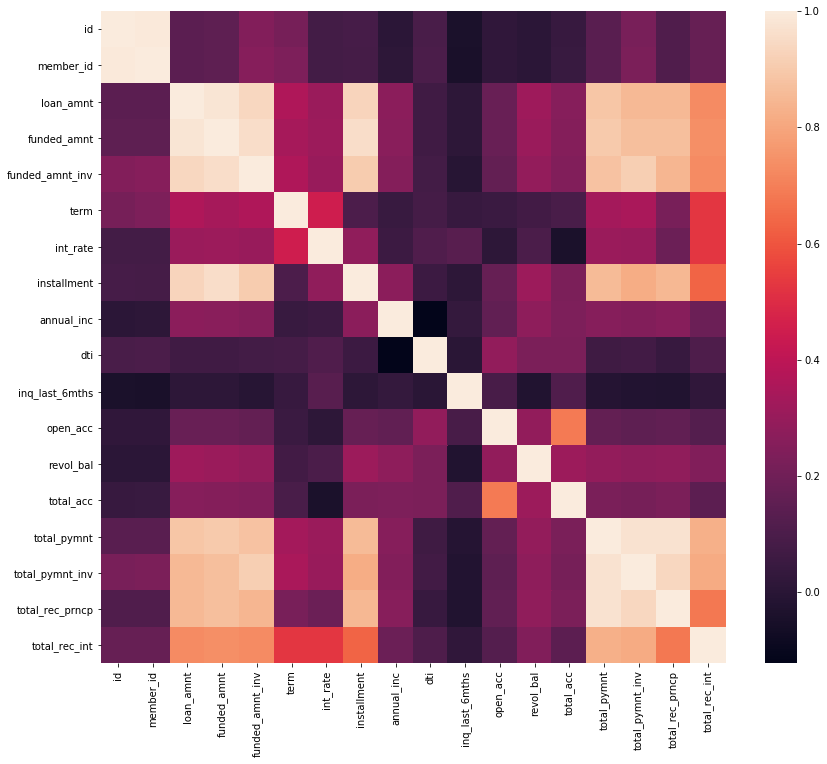

In [ ]:
plt.figure(figsize=[14,12])
sns.heatmap(lcorr)

In [ ]:
# From the above heat map we see that total_pymnt, total_pymnt_inv and total_rec_prncp are highly correllated with each other, 
#can be dropped as it might not give true picture
loan.drop(['total_pymnt','total_pymnt_inv','total_rec_prncp'],axis=1,inplace=True)

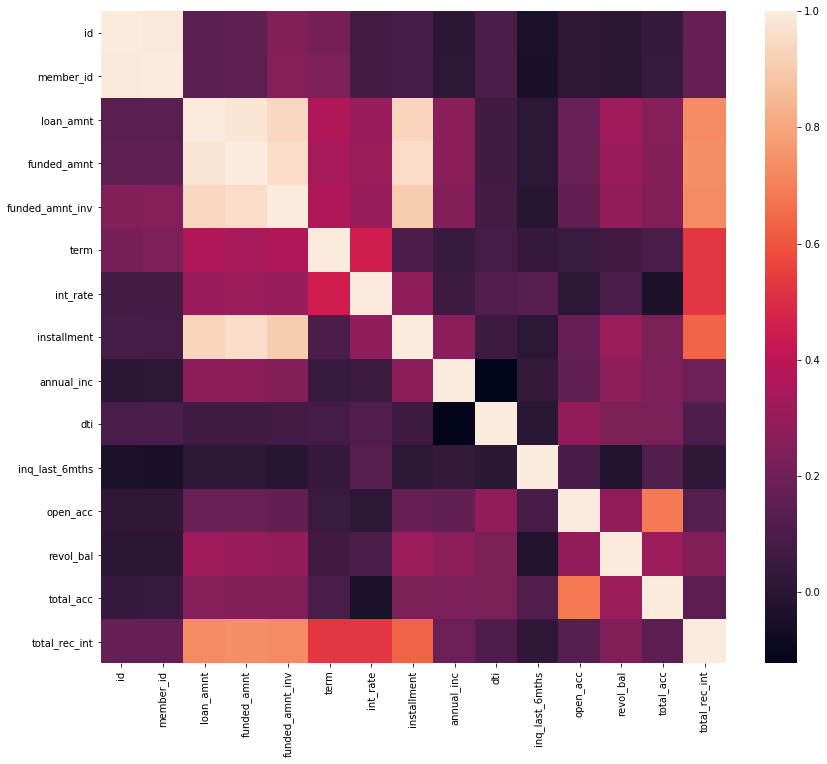

In [ ]:
lcorr = loan.corr()
plt.figure(figsize=[14,12])
sns.heatmap(lcorr)

In [ ]:
# Upon further investigation we see that 'house_ownership' is a categorical column, we need to convert it numeric
loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [38]:
# Convert to Categorical Column
loans['home_ownership'] = loans['home_ownership'].astype('category')
loans['loan_status'] = loans['loan_status'].astype('category')
# Mortgage is 0, None is 1, other is 2, own is 3 and Rent is 4
loans['home_ownership'].dtypes

CategoricalDtype(categories=['Charged Off', 'Current', 'Fully Paid'], ordered=False)

In [37]:
# Charged Off is 0, Current is 1, Fully Paid is 2
loans['loan_status'].dtypes

CategoricalDtype(categories=['Charged Off', 'Current', 'Fully Paid'], ordered=False)

In [40]:
category_columns = loans.select_dtypes(['category']).columns

loans[category_columns] = loans[category_columns].apply(lambda x: x.cat.codes)

In [41]:
loans.loc[:, ['home_ownership', 'loan_status']]

,home_ownership,loan_status
0,2,2
1,0,0
2,2,2
3,2,2
4,1,1
5,2,2
6,2,2
7,2,2
8,0,0
9,0,0
